# Imports

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
from wordcloud import WordCloud
from src.predictive_models import (
    load_datasets
)

# Load LiarPlus Dataset

In [3]:
sys.path.append(os.path.abspath(".."))


In [5]:
train_path = "../data/train_set.csv"
val_path = "../data/val_set.csv"
test_path = "../data/test_set.csv"
df_train, df_val, df_test = load_datasets(
    train_path, val_path, test_path
) #preprocessing was done in load_datasets


ParserError: Error tokenizing data. C error: Expected 1 fields in line 2056, saw 12


In [ ]:
df_train.head()

,id,label,statement,subject,speaker,job,state,party,barely_true,false,half_true,mostly_true,pants_on_fire,context,justification
0,2635,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,10540,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2,324,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3,1123,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4,9028,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."


In [ ]:
df_train.shape

(10240, 15)

# EDA

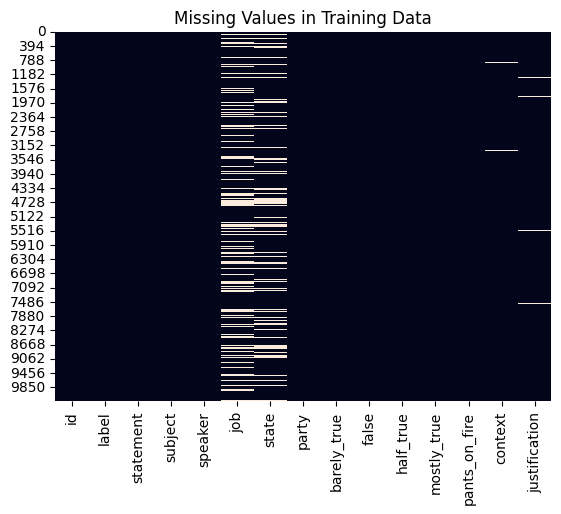

In [ ]:
sns.heatmap(df_train.isna(), cbar=False)
plt.title("Missing Values in Training Data")
plt.show()

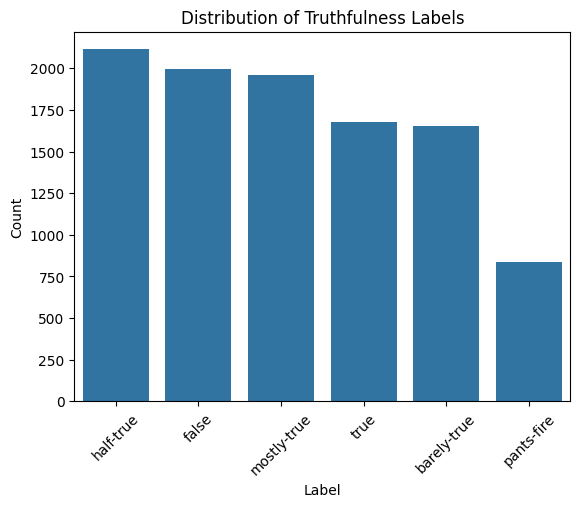

In [ ]:
sns.countplot(data=df_train, x="label", order=df_train["label"].value_counts().index)
plt.title("Distribution of Truthfulness Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Echo Chamber

/var/folders/lj/5gvcfpcj0sz1q841pw7jmk5m0000gn/T/ipykernel_14389/654207525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_speakers.values, y=top_speakers.index, palette="coolwarm")


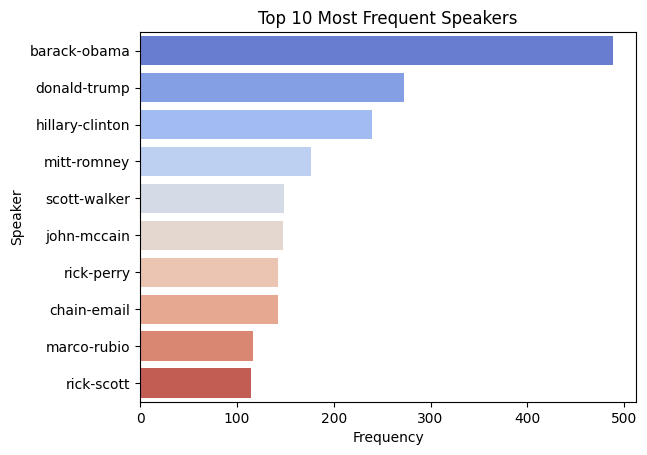

In [ ]:
top_speakers = df_train["speaker"].value_counts().nlargest(10)
sns.barplot(x=top_speakers.values, y=top_speakers.index, palette="coolwarm")
plt.title("Top 10 Most Frequent Speakers")
plt.xlabel("Frequency")
plt.ylabel("Speaker")
plt.show()

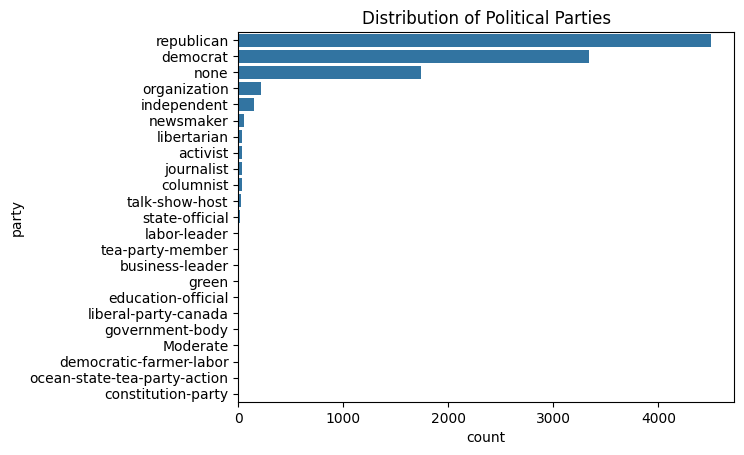

In [ ]:
sns.countplot(data=df_train, y="party", order=df_train["party"].value_counts().index)
plt.title("Distribution of Political Parties")
plt.show()

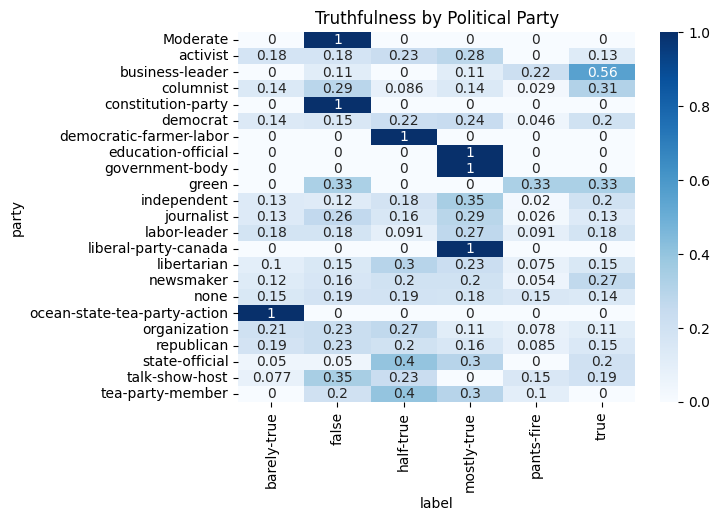

In [ ]:
sns.heatmap(pd.crosstab(df_train["party"], df_train["label"], normalize="index"), annot=True, cmap="Blues")
plt.title("Truthfulness by Political Party")
plt.show()

## Frequency Heuristic

In [ ]:
subject_counts = Counter(chain.from_iterable(df_train['subject'].dropna().str.split(',')))
subject_df = pd.DataFrame(subject_counts.most_common(15), columns=['Subject', 'Count'])

/var/folders/lj/5gvcfpcj0sz1q841pw7jmk5m0000gn/T/ipykernel_14389/1422551564.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subject_df, x='Count', y='Subject', palette='mako')


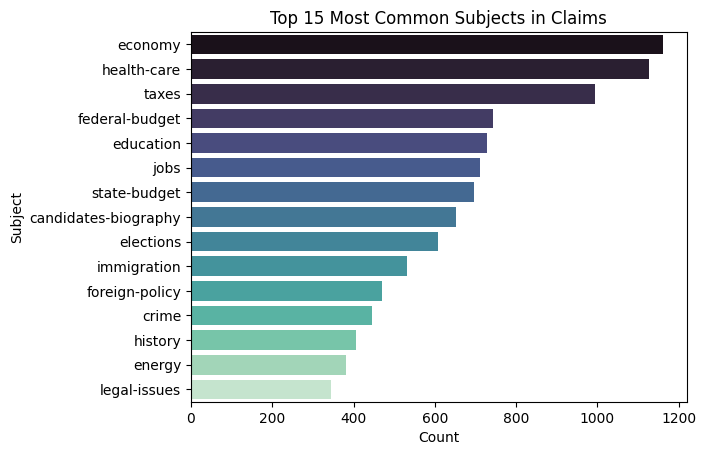

In [ ]:
sns.barplot(data=subject_df, x='Count', y='Subject', palette='mako')
plt.title("Top 15 Most Common Subjects in Claims")
plt.show()

## Sensationalism

In [ ]:
df_train['statement_length'] = df_train['statement'].apply(lambda x: len(str(x).split()))

/var/folders/lj/5gvcfpcj0sz1q841pw7jmk5m0000gn/T/ipykernel_14389/668320695.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='label', y='statement_length', palette='Set2')


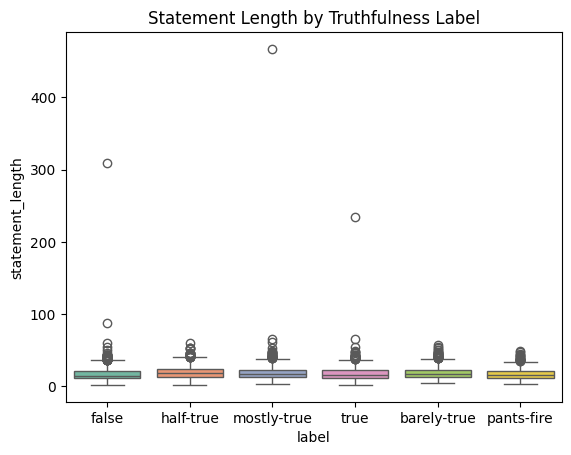

In [ ]:
sns.boxplot(data=df_train, x='label', y='statement_length', palette='Set2')
plt.title("Statement Length by Truthfulness Label")
plt.show()

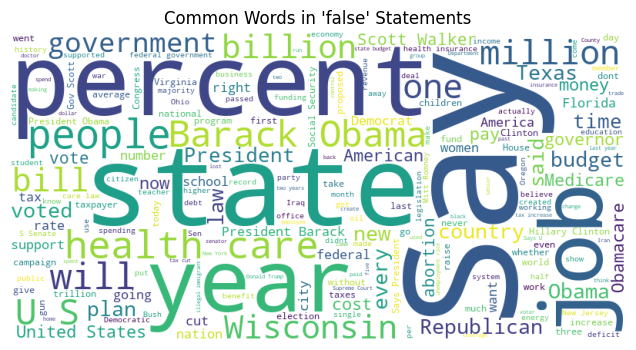

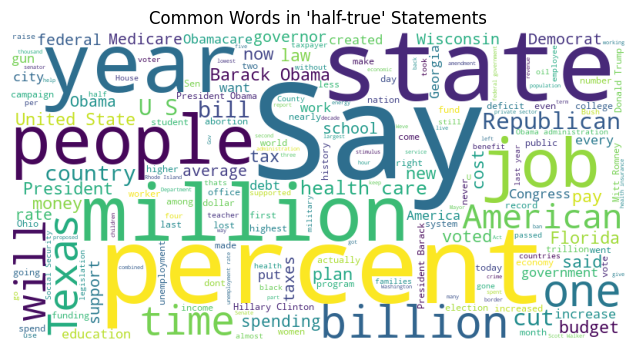

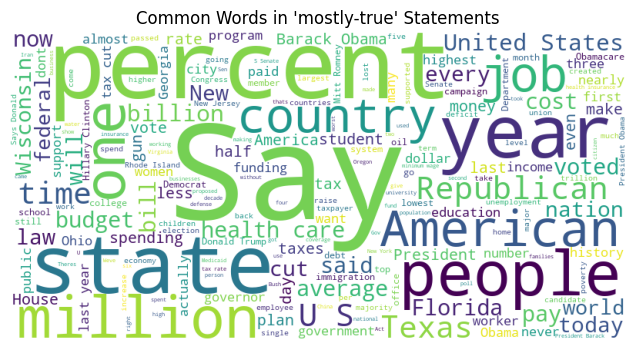

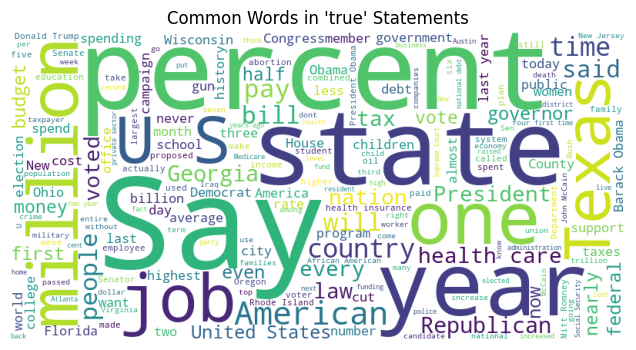

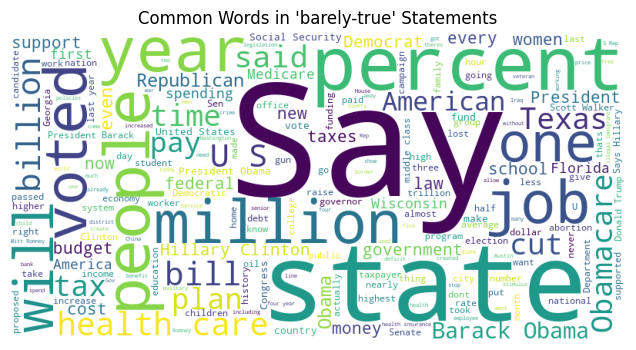

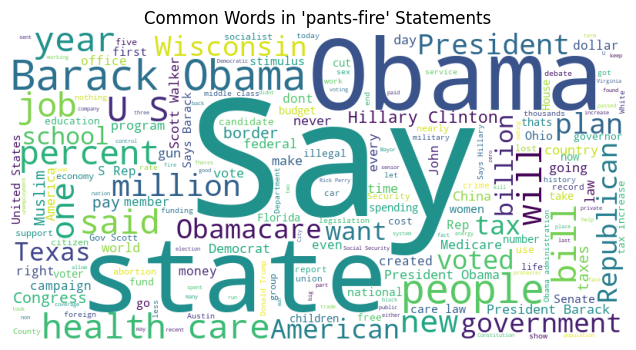

In [ ]:
for label in df_train['label'].unique():
    text = " ".join(df_train[df_train['label']==label]['statement'].astype(str))
    plt.figure(figsize=(8,4))
    plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(text))
    plt.axis('off')
    plt.title(f"Common Words in '{label}' Statements")
    plt.show()

## Credibility

In [ ]:
speaker_scores = df_train.groupby("speaker")[["barely_true", "false", "half_true", "mostly_true", "pants_on_fire"]].sum()
speaker_scores["credibility_score"] = (
    (speaker_scores["mostly_true"] + speaker_scores["half_true"]) -
    (speaker_scores["false"] + speaker_scores["pants_on_fire"])
)

In [ ]:
top_cred = speaker_scores["credibility_score"].nlargest(10)
low_cred = speaker_scores["credibility_score"].nsmallest(10)

/var/folders/lj/5gvcfpcj0sz1q841pw7jmk5m0000gn/T/ipykernel_14389/1557855951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cred.values, y=top_cred.index, palette="Greens_r")


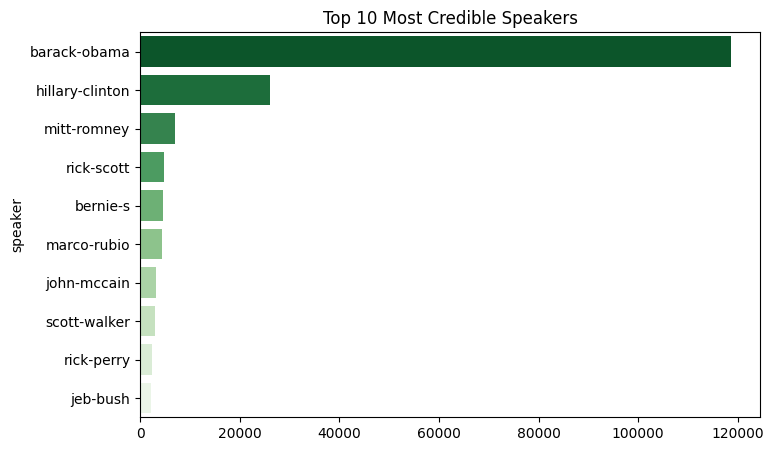

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_cred.values, y=top_cred.index, palette="Greens_r")
plt.title("Top 10 Most Credible Speakers")
plt.show()

/var/folders/lj/5gvcfpcj0sz1q841pw7jmk5m0000gn/T/ipykernel_14389/691468705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_cred.values, y=low_cred.index, palette="Reds_r")


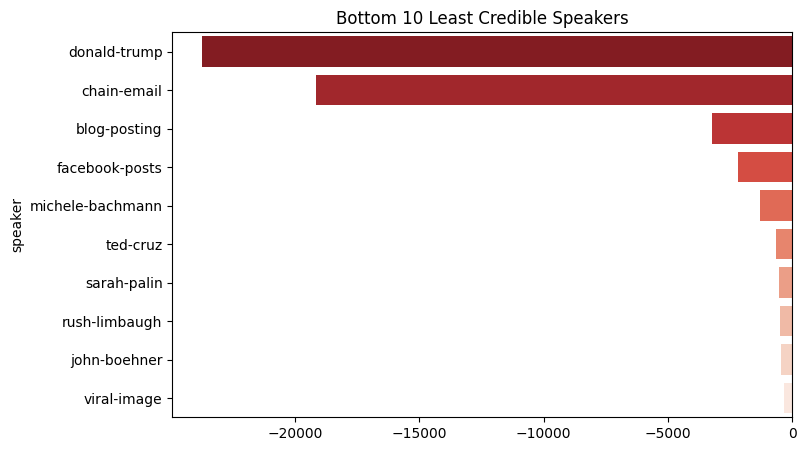

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=low_cred.values, y=low_cred.index, palette="Reds_r")
plt.title("Bottom 10 Least Credible Speakers")
plt.show()

## Cross-Factor Validation

/var/folders/lj/5gvcfpcj0sz1q841pw7jmk5m0000gn/T/ipykernel_14389/1425902632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=context_counts.values, y=context_counts.index, palette="viridis")


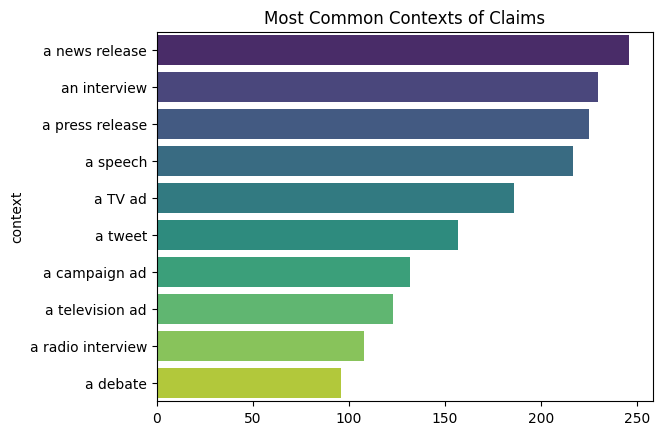

In [ ]:
context_counts = df_train["context"].value_counts().nlargest(10)
sns.barplot(x=context_counts.values, y=context_counts.index, palette="viridis")
plt.title("Most Common Contexts of Claims")
plt.show()

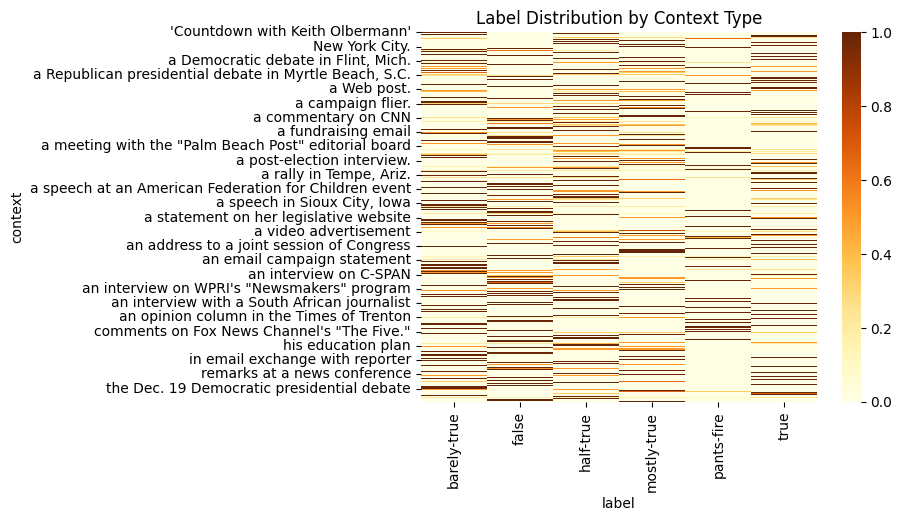

In [ ]:
sns.heatmap(pd.crosstab(df_train["context"], df_train["label"], normalize="index"), cmap="YlOrBr")
plt.title("Label Distribution by Context Type")
plt.show()